In [1]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scs

In [2]:
# 90 Days of Clients
customers = [171, 163, 170, 153, 247, 251, 213, 163, 233, 277, 197, 175, 165, 200, 155, 238, 260, 183, 253, 199, 299, 236, 207, 147 ,219, 238, 234, 256, 177, 160, 143, 188, 241, 230, 234, 143, 152,201, 241, 180, 153, 144, 163, 196, 103, 177, 209, 254, 240, 203, 191, 105, 178, 219,263, 241, 183, 176, 161, 167, 291, 179, 273, 186, 239, 192, 199 ,192, 121, 270, 182, 196, 162,187, 177,168, 201, 143, 185, 228, 217, 149, 238, 177, 201, 220, 182, 190, 193, 186]

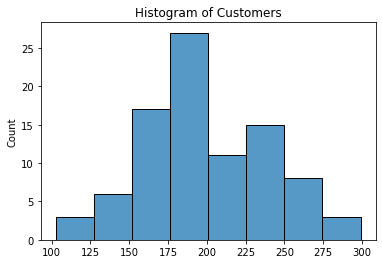

In [9]:
# Histogram of customers
sns.histplot(customers)
plt.title('Histogram of Customers');

In [4]:
# Calculating Mean and Std of customers
cust_avg = np.mean(customers)
cust_std = np.std(customers)

In [5]:
# Calculating CDF from the distribution
cdf = scs.norm.cdf(customers, loc=cust_avg, scale=cust_std)

Text(208.24444444444444, 0.5, 'mean: 198.2')

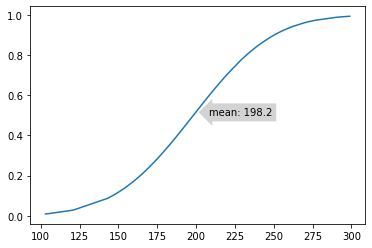

In [7]:
# Plot CDF
sns.lineplot(x=customers, y=cdf)
plt.annotate(f'mean: {round(cust_avg,1)}', xy=(cust_avg+10, 0.5),
             bbox=dict(boxstyle="larrow, pad=0.4", fc="lightgray", ec="r", lw=0))

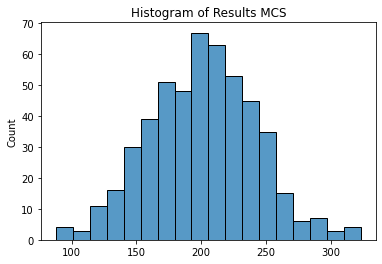

In [14]:
# Function to perform simulations
def mcs(simulations):
  "Provide integer with number of simulations and the function returns an array and histogram with the results"
  # List to store results
  results = []
  # Loop
  for n in range(simulations):
    # Generate random number as a probability
    r = np.random.uniform()
    # Calculate the number
    sim_cust = scs.norm.ppf(r, loc=cust_avg, scale=cust_std)
    # Math floor of the number
    sim_cust = int(sim_cust)
#Store result
    results.append(sim_cust)
# Plot Histogram
  sns.histplot(results)
  plt.title('Histogram of Results MCS')
#Return array
  return results

# Apply mcs function
r = mcs(500)

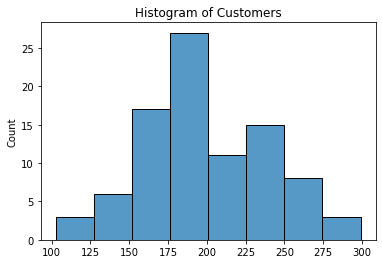

In [12]:
# Histogram of customers
sns.histplot(customers)
plt.title('Histogram of Customers');

We can see that the numbers follow closely the reality. Like the coins example, the more we simulate it, the more it will resemble the real probability.

In [17]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Numbers
import numpy as np
import scipy.stats as scs

In [19]:
# 90 Days of Clients
customers = [171, 163, 170, 153, 247, 251, 213, 163, 233, 277, 197, 175, 165, 200, 155, 238, 260, 183, 253, 199, 299, 236, 207, 147 ,219, 238, 234, 256, 177, 160, 143, 188, 241, 230, 234, 143, 152,
201, 241, 180, 153, 144, 163, 196, 103, 177, 209, 254, 240, 203, 191, 105, 178, 219,263, 241, 183, 176, 161, 167, 291, 179, 273, 186, 239, 192, 199 ,192, 121, 270, 182, 196, 162,187, 177,
168, 201, 143, 185, 228, 217, 149, 238, 177, 201, 220, 182, 190, 193, 186]

# Customers by weekday 
df_cust = pd.DataFrame(list(zip(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']*72, customers)),
                       columns=['wkday', 'customers'])

df_cust.head(7)

,wkday,customers
0,Mon,171
1,Tue,163
2,Wed,170
3,Thu,153
4,Fri,247
5,Sat,251
6,Sun,213


Text(0.5, 1.0, 'Histogram of Customers')

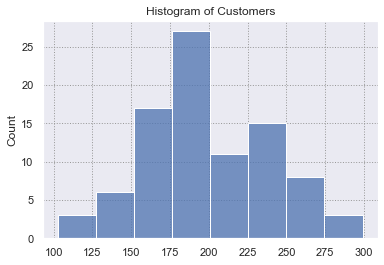

In [20]:
# Histogram of customers
sns.histplot(customers)
plt.title('Histogram of Customers')

In [21]:
# Calculating Means and Std
means = []
stdevs = []
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']:
  m = df_cust.query('wkday == @day')['customers'].mean()
  means.append(m)
  sd = df_cust.query('wkday == @day')['customers'].std()
  stdevs.append(sd)

In [23]:
# Calculating CDF from each distribution
cdf_mon = scs.norm.cdf(df_cust.query('wkday == "Mon"')['customers'], loc=means[0], scale=stdevs[0])
cdf_tue = scs.norm.cdf(df_cust.query('wkday == "Tue"')['customers'], loc=means[1], scale=stdevs[1])
cdf_wed = scs.norm.cdf(df_cust.query('wkday == "Wed"')['customers'], loc=means[2], scale=stdevs[2])
cdf_thu = scs.norm.cdf(df_cust.query('wkday == "Thu"')['customers'], loc=means[3], scale=stdevs[3])
cdf_fri = scs.norm.cdf(df_cust.query('wkday == "Fri"')['customers'], loc=means[4], scale=stdevs[4])
cdf_sat = scs.norm.cdf(df_cust.query('wkday == "Sat"')['customers'], loc=means[5], scale=stdevs[5])
cdf_sun = scs.norm.cdf(df_cust.query('wkday == "Sun"')['customers'], loc=means[6], scale=stdevs[6])

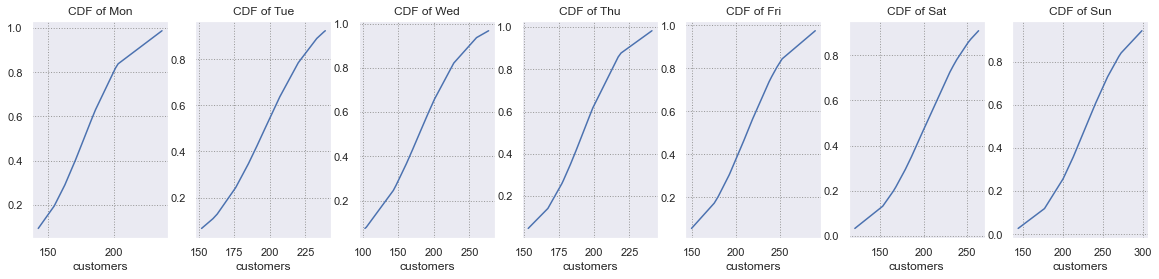

In [24]:
fig, ax = plt.subplots(1, 7, figsize=(20,4))
#Plot CDF
for i, data, cdf, day in [(0, df_cust.query('wkday == "Mon"')['customers'], cdf_mon, 'Mon'), 
                  (1, df_cust.query('wkday == "Tue"')['customers'], cdf_tue, 'Tue'),
                  (2, df_cust.query('wkday == "Wed"')['customers'], cdf_wed, 'Wed'),
                  (3, df_cust.query('wkday == "Thu"')['customers'], cdf_thu, 'Thu'),
                  (4, df_cust.query('wkday == "Fri"')['customers'], cdf_fri, 'Fri'), 
                  (5, df_cust.query('wkday == "Sat"')['customers'], cdf_sat, 'Sat'),
                  (6, df_cust.query('wkday == "Sun"')['customers'], cdf_sun, 'Sun')]:

  g = sns.lineplot(x=data, y=cdf, ax=ax[i])
  g.set_title(f'CDF of {day}');

### **Simulating**

Now let's simulate the attendance for 500 evenings, based on the original distribution.



In [25]:
def mcs(simulations):
  "Provide integer with number of simulations and the function returns an array and histogram with the results"
  # dictionary to store results
  results = {}

  # Loop Weekday
  for i,day in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    # List store the results for the day
    day_sim = []
    for n in range(simulations):
      # Generate random number as a probability
      r = np.random.uniform()
      # Calculate the numbers by weekday
      sim_cust = scs.norm.ppf(r, loc=means[i], scale=stdevs[i])
      # Math floor of the number
      sim_cust = int(sim_cust)
      # List store the results for the day
      day_sim.append(sim_cust)
          
      #Store result
      results[day] = day_sim

  # Plot Histogram
  #sns.histplot(results, color='forestgreen')
  #plt.title('Histogram of Results MCS')

  #Return array
  return results

In [26]:
# Apply the mcs function 500 times
r = mcs(500)

In [27]:
# Create simulations by weekday
simulations = pd.DataFrame(r)
simulations.head(7)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,165,179,124,220,177,181,287
1,123,155,98,200,217,167,227
2,160,231,138,196,309,118,177
3,172,251,128,166,189,237,139
4,195,172,201,218,179,135,222
5,147,197,155,196,189,257,250
6,187,231,173,170,266,214,210


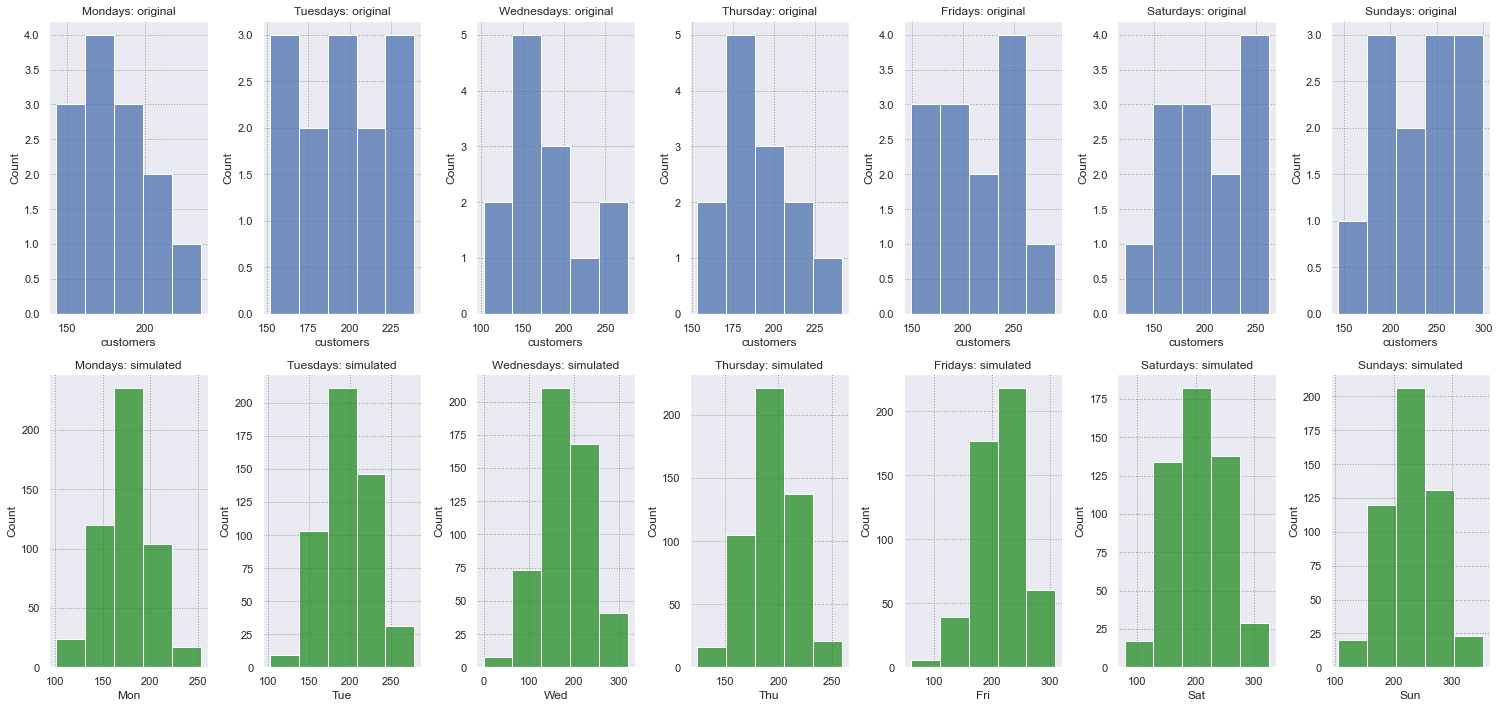

In [28]:
# Setup figure
fig, ax = plt.subplots(figsize=(21,10), tight_layout= True)
# Plot Monday Original
plt.subplot(2, 7, 1)
sns.histplot(data=df_cust.query('wkday == "Mon"'), x='customers')
plt.title('Mondays: original')
# Plot Monday Simulated
plt.subplot(2, 7, 8)
sns.histplot(data=simulations, x='Mon', color='forestgreen', bins=5)
plt.title('Mondays: simulated');

#---

# Plot Tuesday Original
plt.subplot(2, 7, 2)
sns.histplot(data=df_cust.query('wkday == "Tue"'), x='customers')
plt.title('Tuesdays: original')
# Plot Tuesday Simulated
plt.subplot(2, 7, 9)
sns.histplot(data=simulations, x='Tue', color='forestgreen', bins=5)
plt.title('Tuesdays: simulated');

#---

# Plot Wednesday Original
plt.subplot(2, 7, 3)
sns.histplot(data=df_cust.query('wkday == "Wed"'), x='customers')
plt.title('Wednesdays: original')
# Plot Wednesday Simulated
plt.subplot(2, 7, 10)
sns.histplot(data=simulations, x='Wed', color='forestgreen', bins=5)
plt.title('Wednesdays: simulated');

#---

# Plot Thursdays Original
plt.subplot(2, 7, 4)
sns.histplot(data=df_cust.query('wkday == "Thu"'), x='customers')
plt.title('Thursday: original')
# Plot Thursdays Simulated
plt.subplot(2, 7, 11)
sns.histplot(data=simulations, x='Thu', color='forestgreen', bins=5)
plt.title('Thursday: simulated');

#---

# Plot Fridays Original
plt.subplot(2, 7, 5)
sns.histplot(data=df_cust.query('wkday == "Fri"'), x='customers')
plt.title('Fridays: original')

# Plot Fridays Simulated
plt.subplot(2, 7, 12)
sns.histplot(data=simulations, x='Fri', color='forestgreen', bins=5)
plt.title('Fridays: simulated');

#---

# Plot Saturdays Original
plt.subplot(2, 7, 6)
sns.histplot(data=df_cust.query('wkday == "Sat"'), x='customers')
plt.title('Saturdays: original');

# Plot Saturdays Simulated
plt.subplot(2, 7, 13)
sns.histplot(data=simulations, x='Sat', color='forestgreen', bins=5)
plt.title('Saturdays: simulated');

#---

# Plot Sundays Original
plt.subplot(2, 7, 7)
sns.histplot(data=df_cust.query('wkday == "Sun"'), x='customers')
plt.title('Sundays: original')

# Plot Sundays Simulated
plt.subplot(2, 7, 14)
sns.histplot(data=simulations, x='Sun', color='forestgreen', bins=5)
plt.title('Sundays: simulated');